[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1vxGBnzT5MN0sLTNDjuhMfClvmSMWZD15?usp=sharing)

[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/Rithik-Alias/Salary-prediction-dashboard)

**Imported necessary libraries and dataset**

In [1]:
#coloned the git repository
!git clone --recursive https://github.com/Rithik-Alias/Salary-prediction-dashboard.git
%cd /content/Salary-prediction-dashboard

fatal: destination path 'Salary-prediction-dashboard' already exists and is not an empty directory.
/content/Salary-prediction-dashboard


In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
#imported the dataset
file = pd.read_csv('salarydata.csv')
file.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Cleansing and sanitization of the dataset**

In [4]:
#checked if there is any null value in the dataset
file.isnull().sum()  #we can see that there is no null values in the data set

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [5]:
file['workclass'].unique()
#values in the attribute work-class

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [6]:
#we can see that there is a '?' in the set of values
file.loc[file['workclass'] == '?', 'workclass'] = 'Unknown'
#changed '?' into 'Unknown'

In [7]:
file['occupation'].unique()
#values in the attribute occupation

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [8]:
#we can see that there is a '?' in the set of values
file.loc[file['occupation'] == '?', 'occupation'] = 'Unknown'
#changed '?' into 'Unknown'

In [9]:
file['native-country'].unique()
#values in the attribute native-country

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [10]:
#we can see that there is a '?' in the set of values
file.loc[file['native-country'] == '?', 'native-country'] = 'Unknown'
#changed '?' into 'Unknown'

In [11]:
file = file.drop(columns = ['capital-gain', 'capital-loss', 'education-num'])
#unnecessary since its something that happens after salary is given.
file

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


**Visualization of the data set**

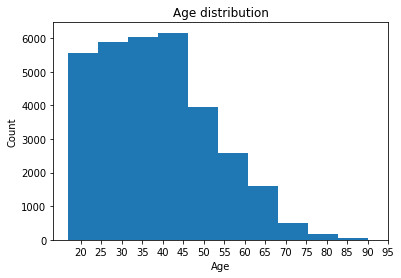

In [12]:
plt.hist(file['age'])
plt.title('Age distribution')
plt.rcParams['figure.figsize'] = (9,4)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(20,100,5))
plt.show()

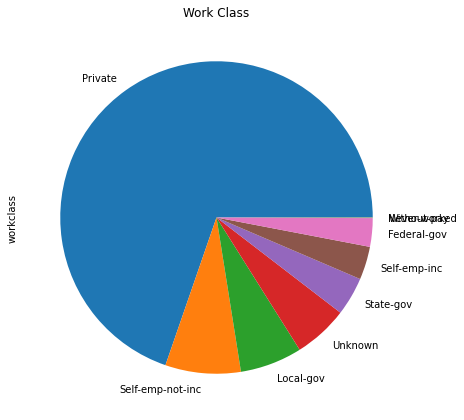

In [36]:
file['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (7,10)
plt.title('Work Class')
plt.show()

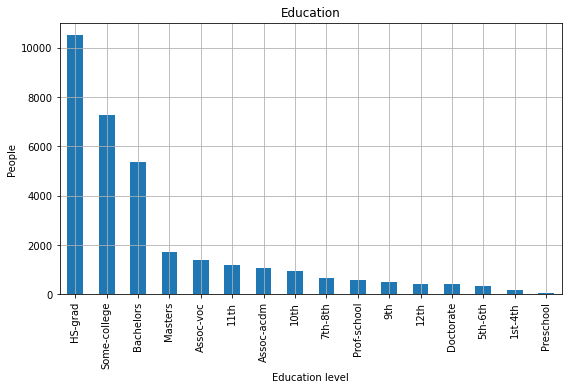

In [34]:
file['education'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (9,5)
plt.xlabel('Education level')
plt.ylabel('People')
plt.title('Education')
plt.grid()
plt.show()

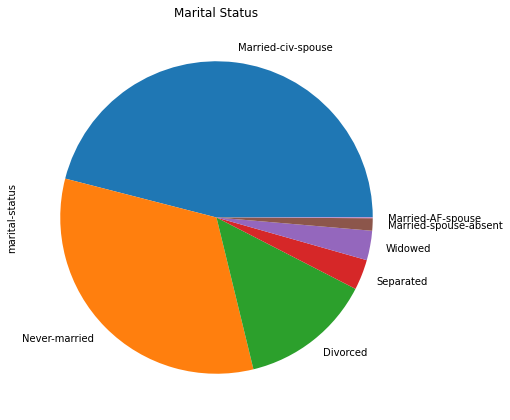

In [32]:
file['marital-status'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (7,10)
plt.title('Marital Status')
plt.show()

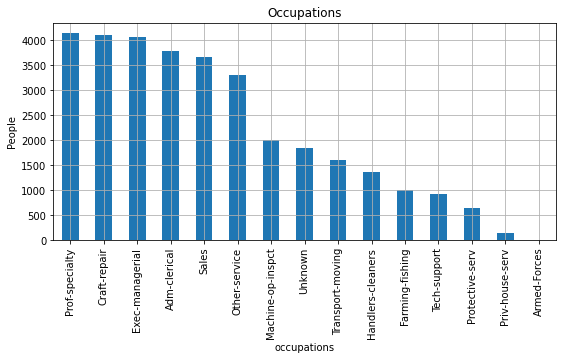

In [28]:
file['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (9,4)
plt.xlabel('occupations')
plt.ylabel('People')
plt.title('Occupations')
plt.grid()
plt.show()

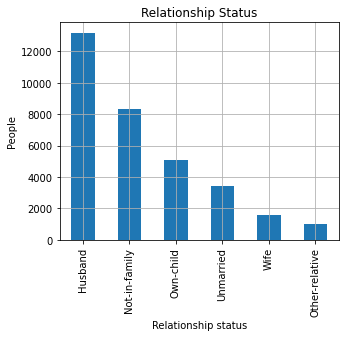

In [30]:
file['relationship'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (5,4)
plt.xlabel('Relationship status')
plt.ylabel('People')
plt.title('Relationship Status')
plt.grid()
plt.show()

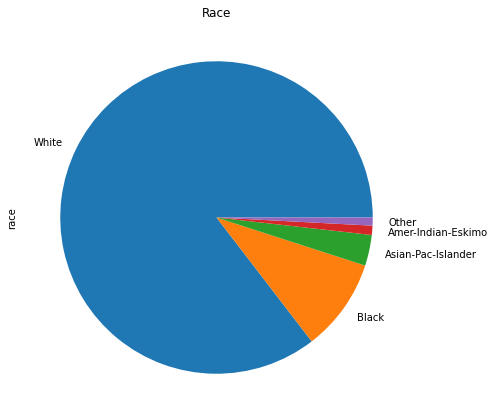

In [26]:
file['race'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (7,10)
plt.title('Race')
plt.show()

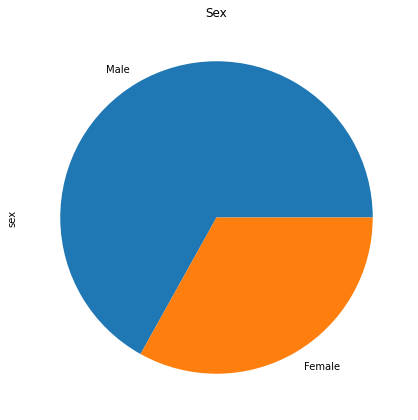

In [19]:
file['sex'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (7,10)
plt.title('Sex')
plt.show()

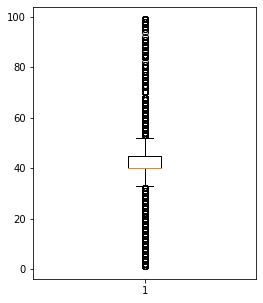

In [24]:
plt.boxplot(file['hours-per-week'])
plt.rcParams['figure.figsize'] = (4,5)
plt.show()

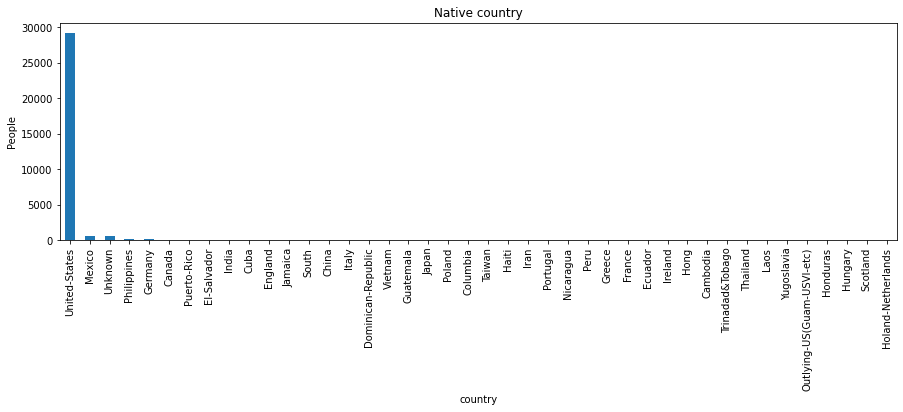

In [22]:
file['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (15,4)
plt.xlabel('country')
plt.ylabel('People')
plt.title('Native country')
plt.show()

**Pre-processing of dataset**

In [37]:
target = file.pop('salary')
#Extracted and defined the target

In [38]:
character_columns = file.dtypes.pipe(lambda x: x[x == 'object']).index
character_columns
#Extracting columns having character values

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [39]:
label_mapping ={}
for col in character_columns:
  file[col], label_mapping[col] = pd.factorize(file[col])
#converting these character values to numeric values
file.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,0,0,0,0,0,0,0,40,0
1,50,1,0,1,1,1,0,0,13,0
2,38,2,1,2,2,0,0,0,40,0
3,53,2,2,1,2,1,1,0,40,0
4,28,2,0,1,3,2,1,1,40,1


**Training the model**

In [40]:
#Here in our target we have 2 classes <=50 and >50
#Hence we need to use a binary classifier
#So we will use logistic regression

#normalizing the data
scaler = StandardScaler()  #we scale the data for larger values not affecting the smaller values
file = scaler.fit_transform(file.values)

In [41]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(file,target,test_size = 0.3, random_state = 42)
#Train the model
classifier = LogisticRegression().fit(x_train, y_train)
prediction = classifier.predict(x_test)

print("---- Training complete-----")

---- Training complete-----


In [42]:
#generate report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       <=50K       0.80      0.94      0.86      7455
        >50K       0.55      0.24      0.33      2314

    accuracy                           0.77      9769
   macro avg       0.68      0.59      0.60      9769
weighted avg       0.74      0.77      0.74      9769



**Hyper Parameter Tuning**

In [48]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.936333 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.928000 (0.024549) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.930333 (0.025493) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.929000 (0.026752) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.928000 (0.024413) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.931333 (0.026424) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.930000 (0.025949) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.929000 (0.024406) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.928667 (0.028721) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.931333 (0.026043) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.932667 (0.025811) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.931333 (0.022910) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.932667 (0.026575) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.936333 (0.023872) wi

In [49]:
classifier = LogisticRegression(penalty = grid_result.best_params_['penalty'], C = grid_result.best_params_['C'], solver = grid_result.best_params_['solver']).fit(x_train, y_train)
prediction = classifier.predict(x_test)

print("---- Training complete-----")

---- Training complete-----


In [50]:
#generate report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       <=50K       0.80      0.94      0.86      7455
        >50K       0.56      0.23      0.32      2314

    accuracy                           0.77      9769
   macro avg       0.68      0.59      0.59      9769
weighted avg       0.74      0.77      0.74      9769



**Testing on a Particular Case**

In [53]:
#generate a particular test data
test_data = []
test_data.append(int(input('Enter the age : ')))
test_data.append(input('Enter the work-class : '))
test_data.append(input('Enter the education level : '))
test_data.append(input('Enter the marital-status : '))
test_data.append(input('Enter the occupation : '))
test_data.append(input('Enter the relationship status : '))
test_data.append(input('Enter the race : '))
test_data.append(input('Enter the sex : '))
test_data.append(int(input('Enter the no. of hours he/she work per week : ')))
test_data.append(input('Enter the native-country : '))

Enter the age : 26
Enter the work-class : Private
Enter the education level : Bachelors
Enter the marital-status : Never-married
Enter the occupation : Armed-Forces
Enter the relationship status : Unmarried
Enter the race : White
Enter the sex : Male
Enter the no. of hours he/she work per week : 60
Enter the native-country : United-States


In [58]:
#testing for this particular test data
df = pd.DataFrame({'age' : [test_data[0]],
                   'work-class' : [test_data[1]],
                   'education' : [test_data[2]],
                   'marital-status' : [test_data[3]],
                   'occupation' : [test_data[4]],
                   'relationship' : [test_data[5]],
                   'race' : [test_data[6]],
                   'sex' : [test_data[7]],
                   'hours-per-week' : [test_data[8]],
                   'native-country' : [test_data[9]]
                   })
character_data = df.dtypes.pipe(lambda x: x[x == 'object']).index
test_label_mapping ={}
for col in character_data:
  df[col], test_label_mapping[col] = pd.factorize(df[col])
test_scaler = StandardScaler()
df = test_scaler.fit_transform(df.values)
pred = classifier.predict(df)
print(f"The salary will be {pred[0]}")

The salary will be <=50K
